# PUBG Finish Placement Prediction - Exploratory Data Analysis (EDA)

## 1. Proje ve Problem Tanımı
Bu projenin amacı, PUBG (PlayerUnknown's Battlegrounds) oyunundaki maç sonu sıralamalarını (**winPlacePerc**) tahmin etmektir. Elimizdeki veri seti, oyuncuların oyun içi istatistiklerini (öldürme, gidilen mesafe, iyileştirme vb.) içermektedir.

**Hedef:** Verilen feature'ları kullanarak oyuncunun maç sonunda kaçıncı olacağını (0 ile 1 arasında bir değer) tahmin eden bir regresyon modeli geliştirmek.

## 2. Kütüphanelerin Yüklenmesi ve Ayarlar

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

DATA_PATH = "../pubg_predictor/data/train_V2.csv"

In [3]:
print("Loading data...")
df = pd.read_csv(DATA_PATH)
print(f"Data shape: {df.shape}")
print("Data loaded successfully.")

Loading data...
Data shape: (4446966, 29)
Data loaded successfully.


## 3. Veriye İlk Bakış
Veri setinin genel yapısını, sütun tiplerini ve bellek kullanımını inceliyoruz.

In [4]:
# İlk 5 satıra bir bakış atalım.
print("First few rows of the data:")
display(df.head())

# Veri setinin genel bilgilerini inceleyelim.
print("Data Summary:")
print(df.info())

First few rows of the data:


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27

## 4. Eksik Veri Analizi (Missing Values)
Veri setinde NaN (boş) değer var mı kontrol ediyoruz. Varsa temizlememiz gerekecek.

In [4]:
# Eksik verileri kontrol edelim.
print("Checking for missing values:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

# Eğer eksik veri varsa, bu satırları gösterelim.
if df.isnull().sum().sum() > 0:
    print("Showing rows with missing values:")
    display(df[df.isnull().any(axis=1)])

Checking for missing values:
winPlacePerc    1
dtype: int64
Showing rows with missing values:


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


## 5. Hedef Değişken Analizi: winPlacePerc
Tahmin etmeye çalıştığımız değişkenin dağılımına bakıyoruz. Dengeli bir dağılım mı var?

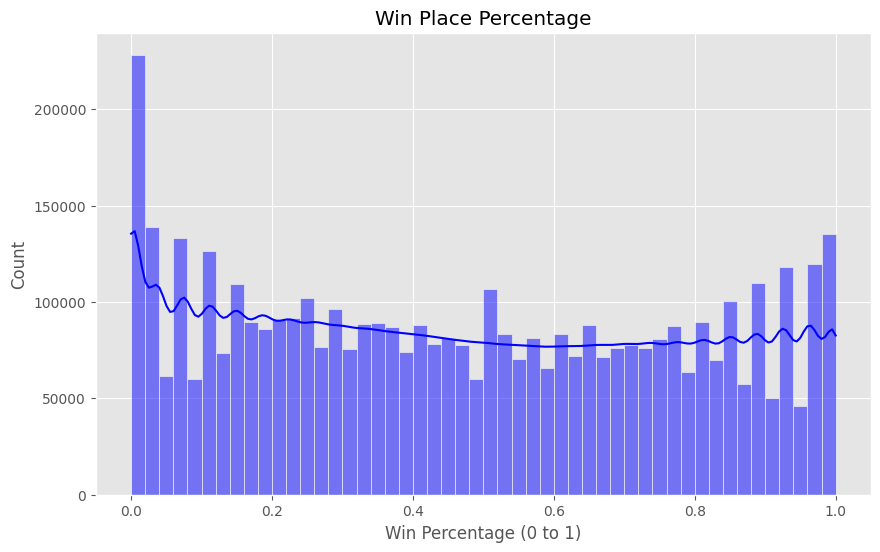

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['winPlacePerc'], bins=50, kde=True, color='blue')
plt.title("Win Place Percentage")
plt.xlabel('Win Percentage (0 to 1)')
plt.show()

## 6. Korelasyon Analizi
Hangi özelliklerin kazanma oranıyla (`winPlacePerc`) daha yüksek ilişkisi var?

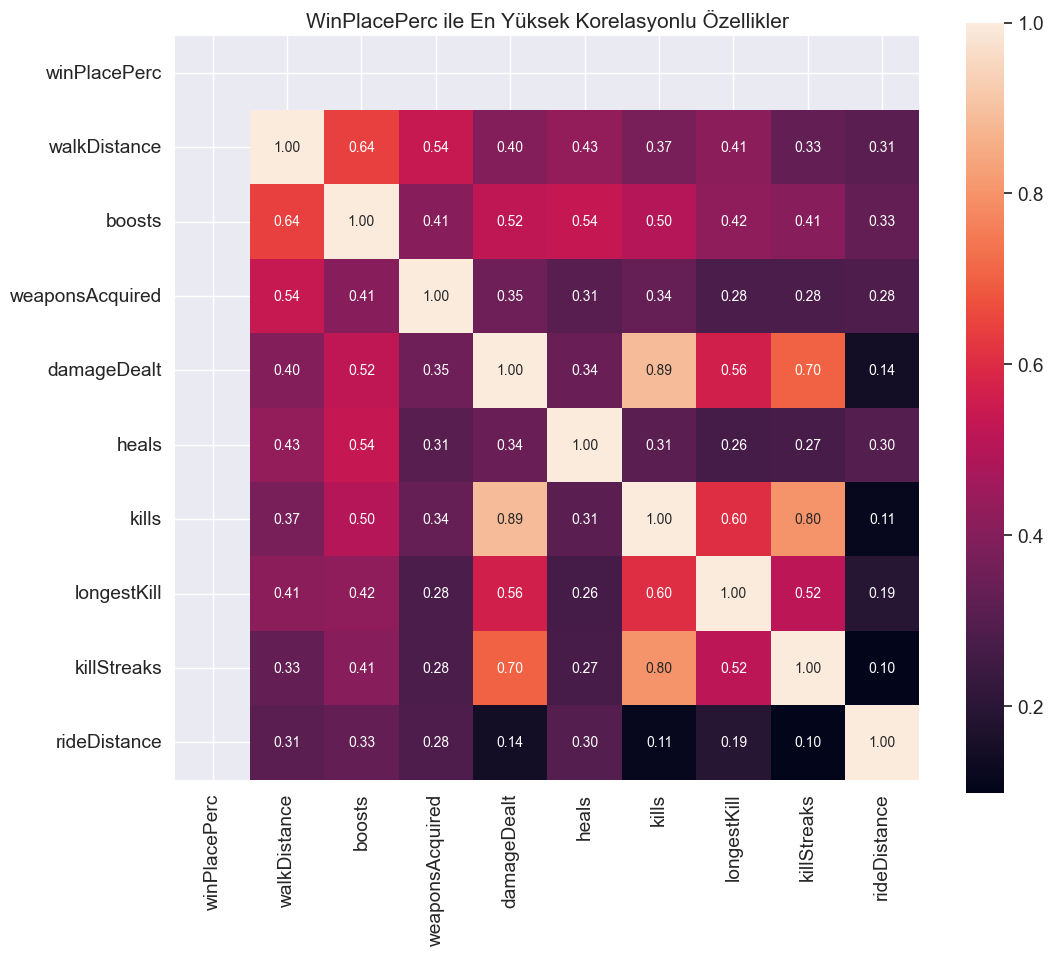

In [13]:
# Sadece sayısal sütunları al
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesapla (En yüksek 10 ilişkiyi görelim)
k = 10 # Gösterilecek değişken sayısı
cols = numeric_df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title("WinPlacePerc ile En Yüksek Korelasyonlu Özellikler")
plt.show()

Yukarıda eksik verileri kontrol ettiğimiz kısımda 1 adet eksik verimiz olduğunu gördük. Bu NaN yani boş/hatalı veri yüzünden kullandığımız Numpy fonksiyonu temize çekmediğimiz için tüm sonuçları NaN döndürdü. Şimdi eksik veriyi temizleyelim.

## 7. Eksik Veri Temizliği

In [7]:
# Tekrardan eksik veri sayısını kontrol edelim.
print("Missing value count before cleaning:", df["winPlacePerc"].isnull().sum())

# winPlacePerc sütunundaki eksik veriyi kaldıralım.
df = df.dropna(subset=['winPlacePerc'])

print("Missing value count after cleaning:", df["winPlacePerc"].isnull().sum())
print("Misssing data cleaned successfully.")

Missing value count before cleaning: 1
Missing value count after cleaning: 0
Misssing data cleaned successfully.


## 8. Korelasyon Analizi Kontrolü
Tekrardan analizimizi kontrol edelim.

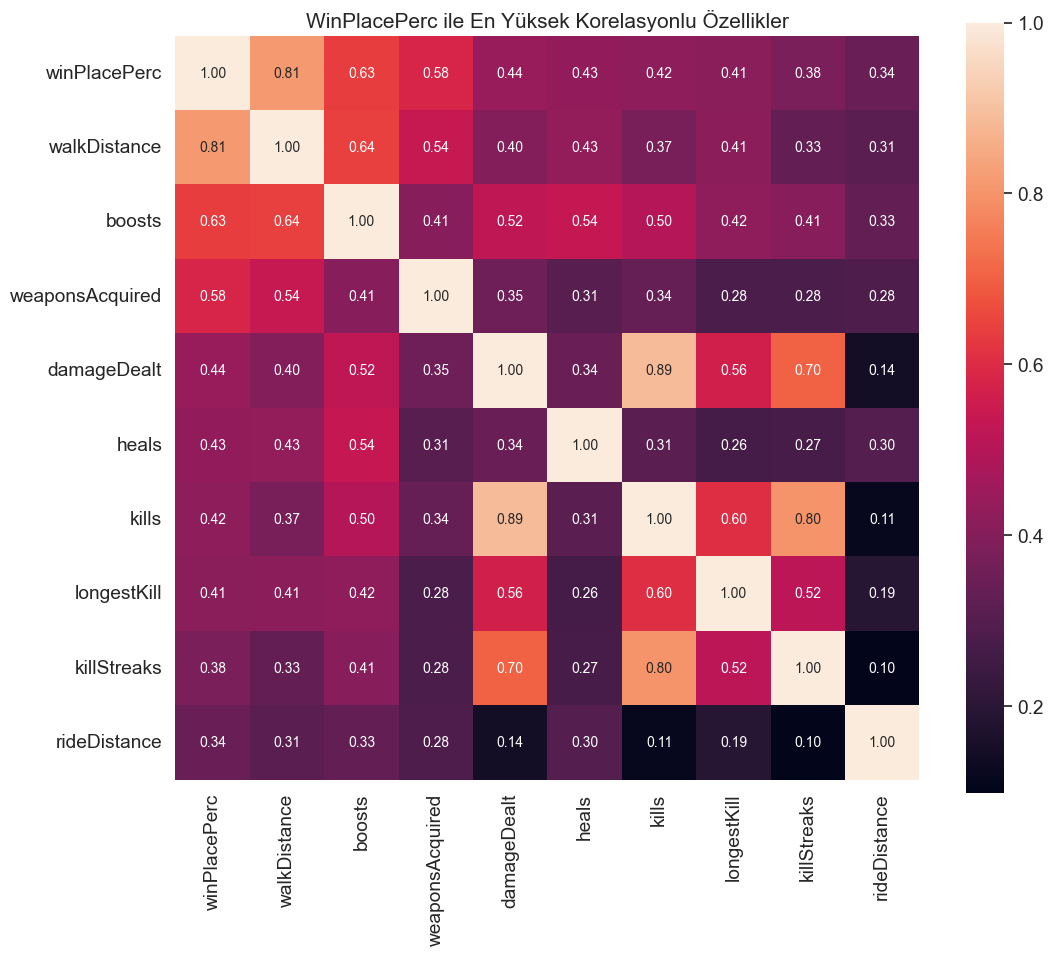

In [8]:
# Sadece sayısal sütunları al
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesapla (En yüksek 10 ilişkiyi görelim)
k = 10 # Gösterilecek değişken sayısı
cols = numeric_df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title("WinPlacePerc ile En Yüksek Korelasyonlu Özellikler")
plt.show()

## 9. Analiz
- Hayatta Kalma > Savaşma: "walkDistance" ile "winPlacePerc" arasındaki ilişki 0.81. Adam vurmaktansa hayatta kalmaya önem verip hareket halinde olmak daha önemli.

- Loot Yapmak Önemli: "boosts" (0.63) ve "weaponsAcquired" (0.58) da çok yüksek.

- "kills" ve "damageDealt" arasında 0.89 ilişki var. İleride model kurarken bu ikisi birbirini tekrar ettiği için modelin kafasını karıştırma ihtimali var.
